# Analyse Numérique
TP 2:
réaliser par: Intissar Sidaoui¶
2DNI Group 1

# Exercice N°1:


# Premiérement :
Que renvoie la fonction PR lorsqu'on lui déclare x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n)) et y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n)) deux vecteurs de même longueur n et c un nombre réel donné.

In [11]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [13]:
X=[1 ,2 ,3 ,4];
Y=[-1, 0, 2 ,1];
for i in X:
    print(prog(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0


10

# Deuxiément :
le vecteur LL après la fin de la boucle kk

In [14]:
x=[1 ,2, 3, 4]
y=[-1,0, 2 ,1]

In [18]:
def prog2(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*prod(L))

            return L[3]

In [19]:
for i in x:
    print(prog2(x,y,i))
    

1
1
1
1


# Troisiément:
dessiner le graph du polynôme de Lagrange de la fonction f(x) = \dfrac{1}{1 + x^2} aux points x=[-1:0.1:1]

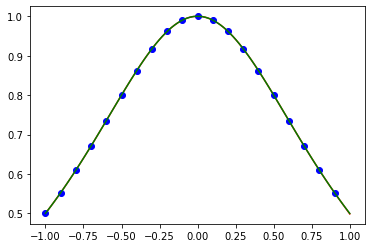

In [28]:
import numpy as np
import matplotlib.pyplot as plt
pn=[]
x=np.arange(-1,1,0.1)
f= lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pn.append(prog(x,y,t[i]))
plt.plot(t,pn,"r",x,y,"bo",t,f(t),"g")
plt.show()

# Quatriément
Représenter la fonction F et p_n, où p_n est le polynôme d'interpolation de Lagrange de F aux points x_0.....x_n.

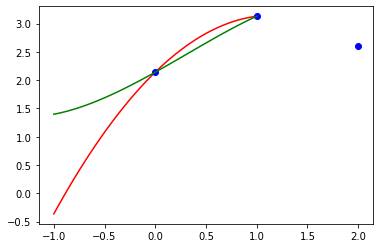

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
pt=[]
x=np.arange(0,3)
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f_2=np.vectorize(f)
y=f_2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pt.append(prog(x,y,t[i]))
plt.plot(t,pt,"r",x,y,"bo",t,f_2(t),"g")
plt.show()

# Maintenant on va tracer la courbe d'erreur (la fonction F-p_n).


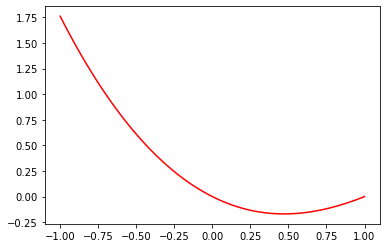

In [34]:
plt.plot(t,f_2(t)-pt,"r")
plt.show()



# Exercice N°2:
#  Phenomène de Runge 

# Premiérement
Vérifier que sur [-5,5] le polynôme d'interpolation de Lagrange de la fonction f définie par f(x)=\displaystyle{\frac{1}{1+x^2}}, en N points uniformément espacés ne convergent pas correctement aux voisinages de -1 et , 1 pour N=7,8,9,10 ...



Text(0.5, 1.0, 'Interpolation Equidistante avec N=7')

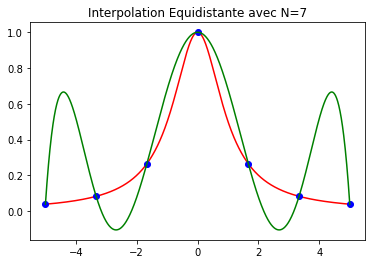

In [39]:
N=7
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X);
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=9')

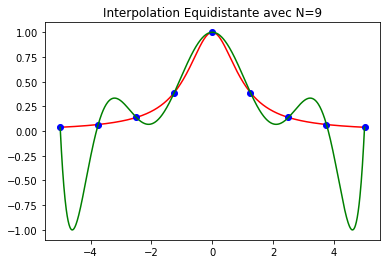

In [47]:
N=9
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")


Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

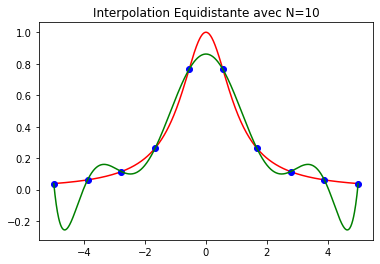

In [48]:
N=10
X=np.linspace(-5,5,N)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")

# Deuxiément 
Les points de Tchebycheff sur un intervalle [a;b] sont définie par :
<html>
    <body>
        <img src="téléchargemet.png"/>
    </body>
    </html>


In [62]:
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v

In [63]:
tcheb(-5,5,11)


[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=10')

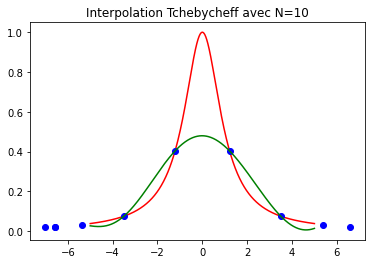

In [70]:
N=10
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=11')

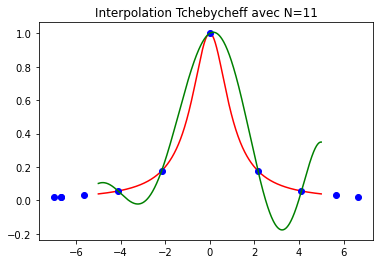

In [81]:
N=11
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=15')

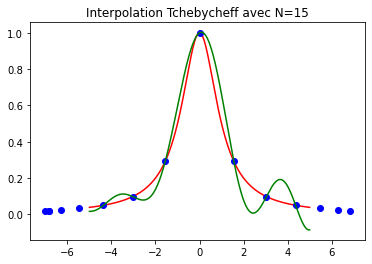

In [91]:
N=15
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=14')

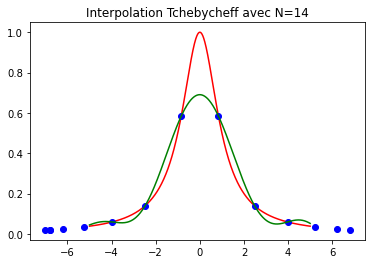

In [92]:
N=14
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=13')

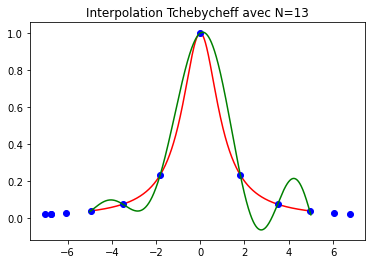

In [93]:
N=13
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=12')

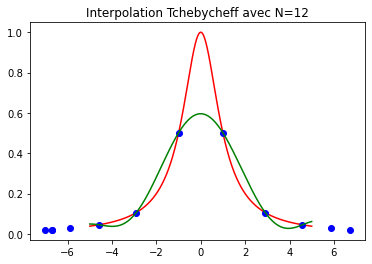

In [94]:
N=12
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=16')

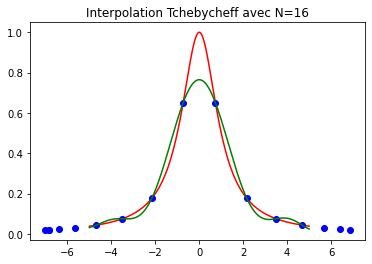

In [95]:
N=16
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

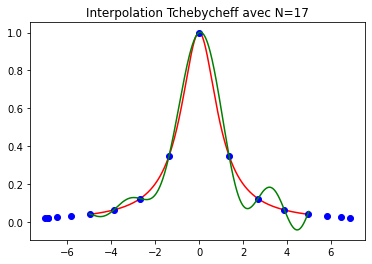

In [96]:
N=17
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=18')

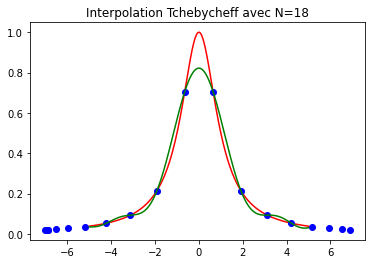

In [97]:
N=18
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=19')

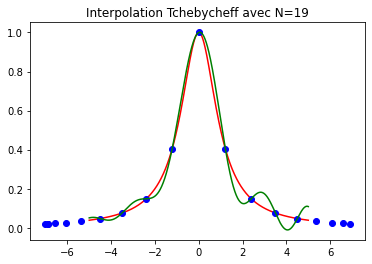

In [98]:
N=19
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=20')

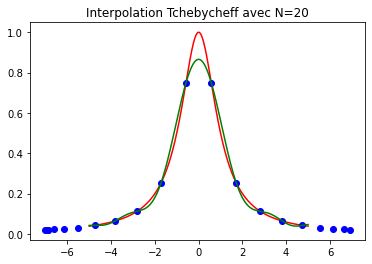

In [99]:
N=20
Yt=[]
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=%i"%N)

# Exercice N °3:
# Premiérement
Déterminer avec l'utilisation les deux codes puis en  calculant à la main le polynôme de Newton pour les données suivantes :

In [108]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f


In [109]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [113]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p


In [115]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

# Deuxiément

Donner le Graphe du polynôme trouvé en précédant ( premiére question) dans l'intervalle [-1;5]

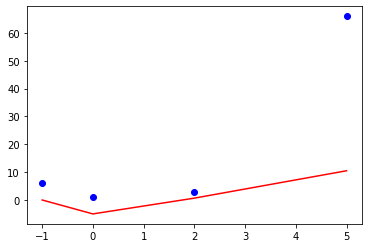

In [118]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')
plt.show()

# Troisiément
Calculer P(1) en utilisant le polynôme trouvé en question 1:

In [121]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]


7.0